## 라이브러리 불러오기

In [1]:
# 기본 라이브러리 
import numpy as np
import pandas as pd
import os, time
import pickle, gzip

In [75]:
# 데이터 시각화 관련 라이브러리
import matplotlib.pyplot as plt

import matplotlib as mpl
import seaborn as sns

%matplotlib inline

In [76]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, cophenet, fcluster
from scipy.spatial.distance import pdist

import warnings
warnings.filterwarnings('ignore')

# 실습 1) 계층적 군집화 후 dendrogram 그리기

## 1) 간단한 데이터 군집화 및 덴드로그램 확인

주어진 데이터에 대해 계층적 군집화를 진행한 후 시각화합니다.

dendogram을 그리기 위한 예제 데이터 생성

In [77]:
X = np.array([[5,3],
              [10,15],
              [15,12],
              [24,10],
              [30,30],
              [85,70],
              [71,80],
              [60,78],
              [70,55],
              [80,91],])

우리가 찍어준 예제 데이터의 분포를 시각화를 통해 확인해봅시다!

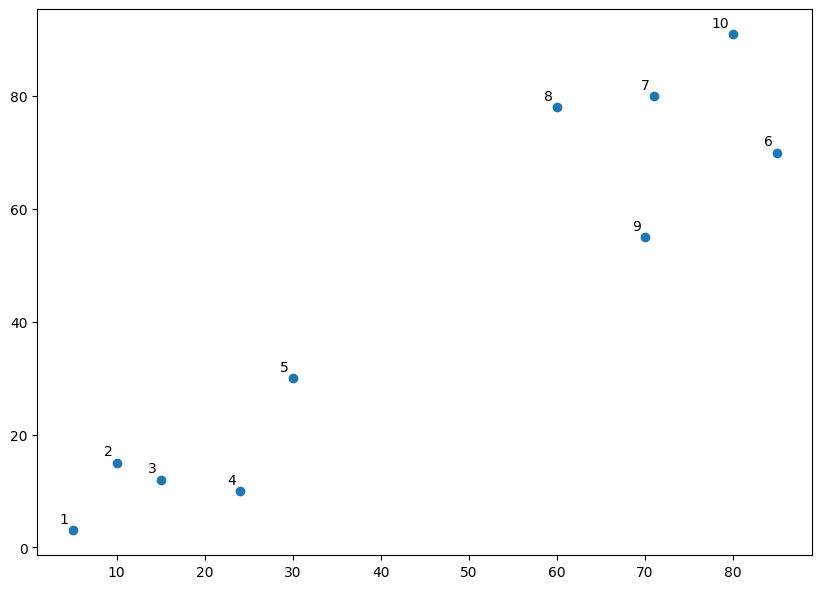

In [78]:
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), 
        xytext=(-3, 3),
        textcoords='offset points', 
        ha='right', 
        va='bottom')
plt.show()

오늘은 응집형 게층적 군집화를 집중적으로 다뤄볼 겁니다!

단일 연결 방식과 완전 연결 방식을 각각 진행해볼게요!

### 1, 단일 연결법으로 계층적 군집화를 진행해봅시다!

먼저, 계층적 군집화를 위해 필요한 함수들은 다음과 같습니다.
- **dendrogram**: 계층 구조를 시각화할 때 사용
- **linkage**: 실제로 데이터를 군집화하는 함수

---

'linkage' 함수는 데이터를 계층적으로 묶기 위해 거리 계산 및 병합 정보를 생성합니다.

사용 방법 : `linkage(data, method)`  

- linkage 함수의 파라미터:
- **입력값**: 데이터, 병합 방식(method)  
- **출력값**: 데이터 병합 순서와 거리 정보가 담긴 배열

- `method`에 들어갈 수 있는 값들:
  - `'single'`: 단일 연결법
  - `'complete'`: 완전 연결법
  - `'average'`: 평균 연결법
  - `'median'` : 중앙 연결법
  - `'centroid'` : 중심 연결법
  - `'ward'`: Ward 연결법
  -> 각각의 연결법에 따라 적합한 메소드를 선택하면 됨!

---

**단일 연결법 (Single Linkage)**:
- 두 군집 간 **가장 가까운 점들 사이의 거리**를 기준으로 병합
- 최소 거리(minimum distance) 방식
- 체인 효과로 인해 길쭉한 형태의 군집이 만들어질 수 있음
- single method를 사용하면 됨!




In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# 단일 연결법 방식으로 linkage matrix를 생성
linked_single = linkage(X, ***)

In [80]:
print(linked_single)

[[ 1.          2.          5.83095189  2.        ]
 [ 3.         10.          9.21954446  3.        ]
 [ 6.          7.         11.18033989  2.        ]
 [ 0.         11.         13.          4.        ]
 [ 9.         12.         14.2126704   3.        ]
 [ 5.         14.         17.20465053  4.        ]
 [ 4.         13.         20.88061302  5.        ]
 [ 8.         15.         21.21320344  5.        ]
 [16.         17.         47.16990566 10.        ]]


#### 먼저, 아까 봤던 산점도에 군집 별로 색을 달리 해서 어떻게 군집화가 이루어졌는지 확인해봅시다!

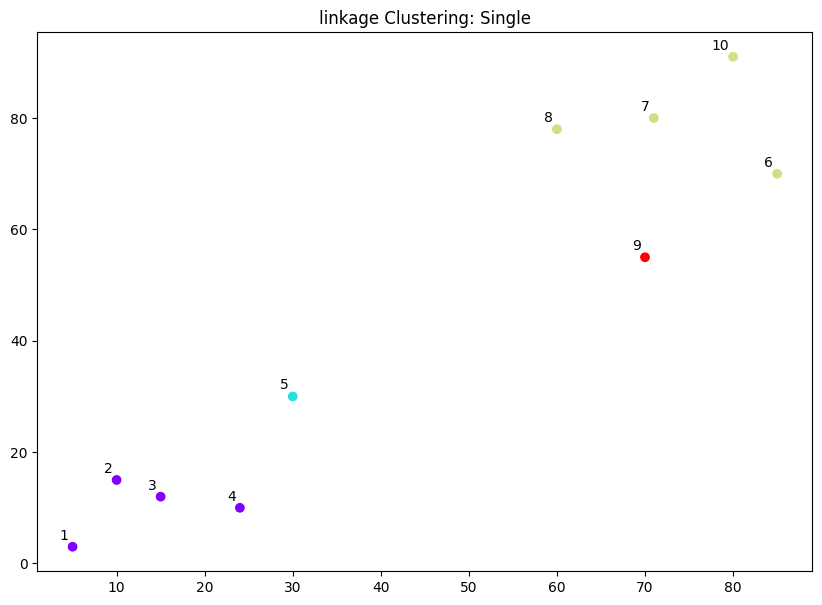

In [81]:
# 시각화
final_clusters = fcluster(linked_single, 4, criterion='maxclust') #군집을 4개로 나눔

title = 'linkage Clustering: Single'
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=final_clusters, 
            cmap='rainbow')


labels = np.arange(1, len(X) + 1)
for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), 
        xytext=(-3, 3),
        textcoords='offset points', 
        ha='right', 
        va='bottom')

plt.title(title)
plt.show()

[1, 2, 3, 4]와 [5], [6, 7, 8, 10]와 [9]이 각각 다른 색상을 가지고 있어요!
-> 총 4개의 색상이 사용되어, 4개의 군집으로 분리된 것을 확인할 수 있습니다!



#### 다음은 덴드로그램을 그려봅시다!

`dendrogram()` 함수는 `linkage()`에서 계산한 거리 정보를 바탕으로  
**계층적 군집화 과정을 시각적으로 나타낸 덴드로그램**을 그립니다.

#### 주요 파라미터:
- `orientation='top'`: 덴드로그램의 방향 (top, left, right, bottom 가능)
- `labels=labelList`: 데이터 포인트에 붙일 이름 (리스트 형태)
- `distance_sort='descending'`: 병합 거리 기준으로 정렬
- `show_leaf_counts=True`: 각 리프(말단 노드)에 속한 데이터 수 표시

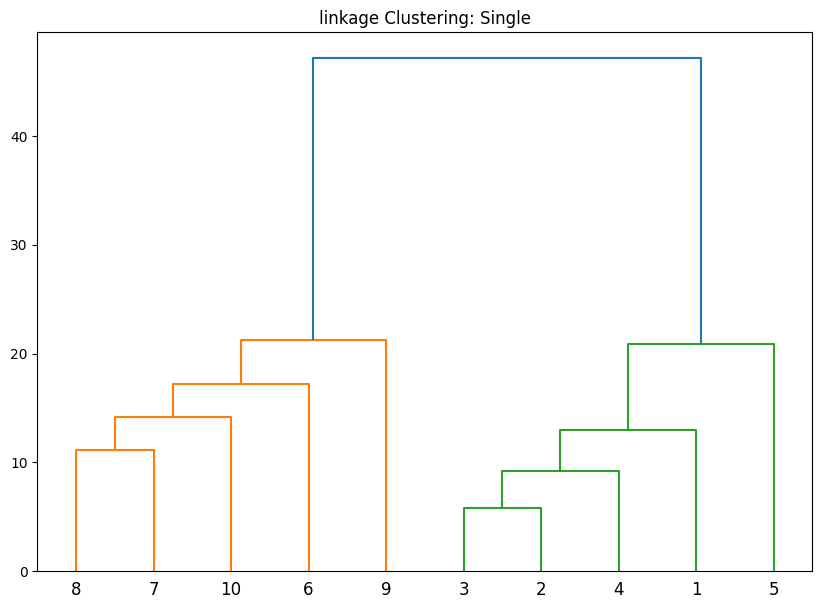

In [82]:
#dendrogram 그리기 

# 각 데이터 포인트에 대한 임의의 레이블 생성(1~10번 데이터)
labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked_single,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.title(title)
plt.show()

위의 산점도에서 [1, 2, 3, 4]와 [5], [6, 7, 8, 10]와 [9]로 구분이 되어 있었죠!

덴드로그램을 보시면 두 갈래로 갈라진 곳에서 9번과 5번이 가장 먼저 분리가 되죠!!

그래서 군집을 4개로 나눴을 때, 9와 5가 별도의 군집으로 분류된 점을 확인할 수 있어요!

### 2. 완전 연결법을 사용해 계층적 군집화를 진행해봅시다!

#### 완전 연결법의 특징:
- 두 군집 간 **가장 먼 점들 사이의 거리**를 기준으로 병합
- 단일 연결법보다 **더 균등하고 컴팩트한 군집** 생성
- 체인 효과(chaining effect)가 적음

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# 완전 연결법 방식으로 linkage matrix를 생성
linked_complete = linkage(X, ***)
print(linked_complete)

[[  1.           2.           5.83095189   2.        ]
 [  6.           7.          11.18033989   2.        ]
 [  0.          10.          13.45362405   3.        ]
 [  3.          12.          20.24845673   4.        ]
 [  5.           8.          21.21320344   2.        ]
 [  9.          11.          23.85372088   3.        ]
 [  4.          13.          36.79673899   5.        ]
 [ 14.          15.          37.36308338   5.        ]
 [ 16.          17.         115.62439189  10.        ]]


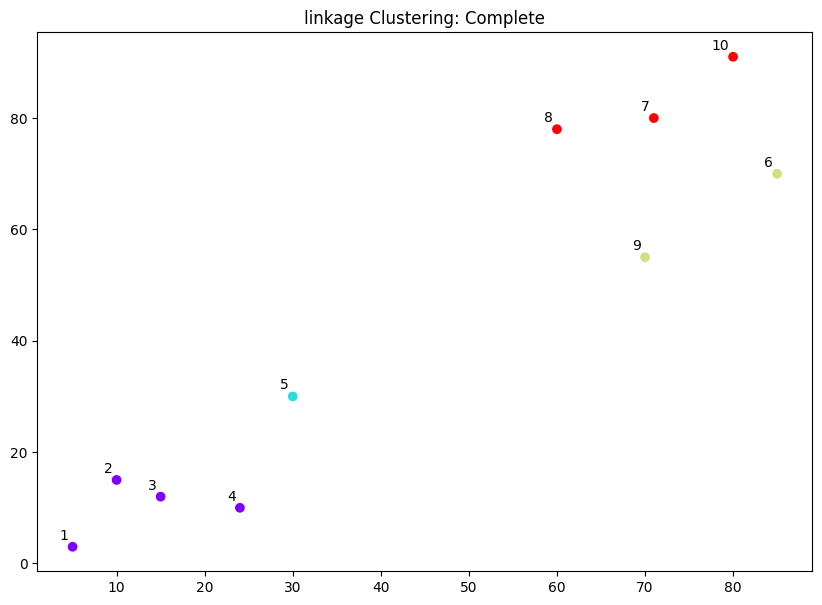

In [87]:
# 산점도 시각화

final_clusters = fcluster(linked_complete, 4, criterion='maxclust') #군집을 4개로 나눔
title = 'linkage Clustering: Complete'
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=final_clusters, 
            cmap='rainbow')


labels = np.arange(1, len(X) + 1)
for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), 
        xytext=(-3, 3),
        textcoords='offset points', 
        ha='right', 
        va='bottom')

plt.title(title)
plt.show()

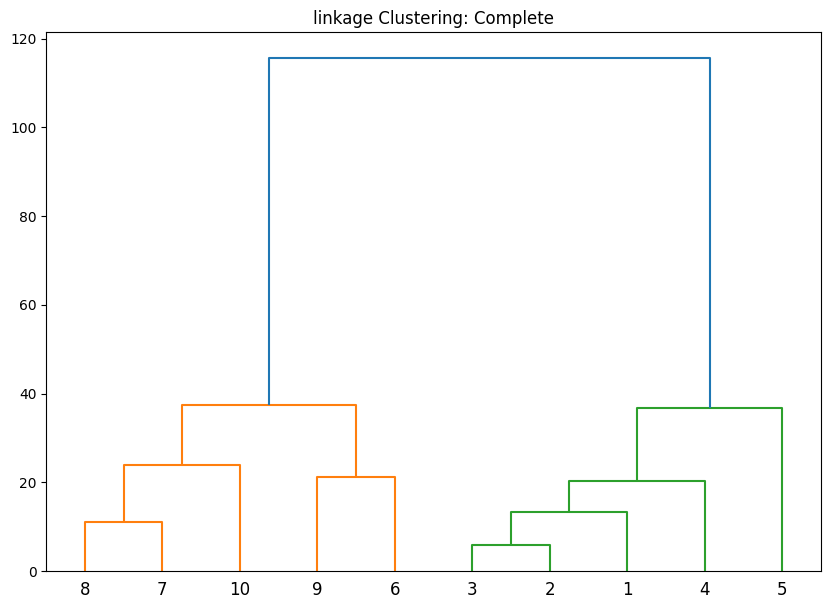

In [88]:
#dendrogram 그리기 

# 각 데이터 포인트에 대한 임의의 레이블 생성(1~10번 데이터)
labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked_complete,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)

plt.title(title)
plt.show()

### <font color="red">이전의 시각화와 비교해봅시다</font>

방금 전에 그린 dendrogram과 비교해봅시다.\
어디에서 dendrogram을 잘랐는 지 보이시나요?

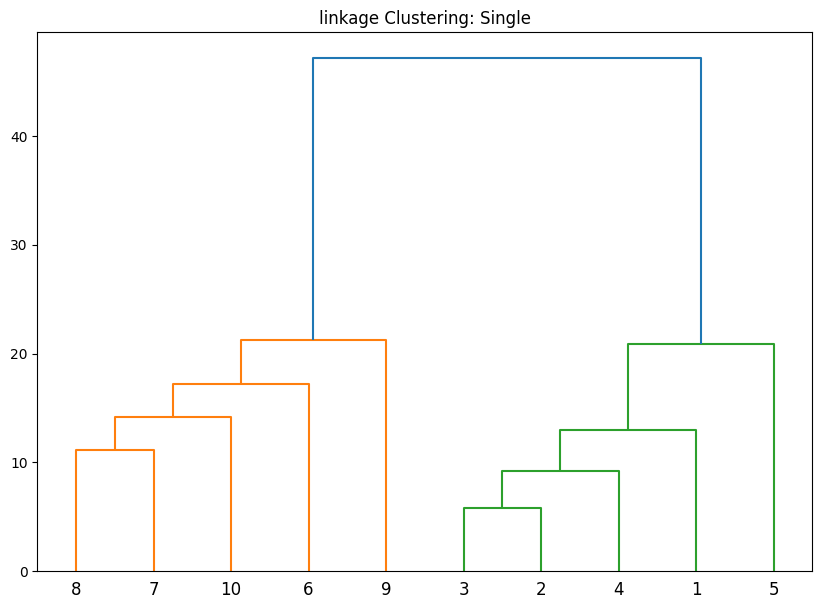

결과에 어떤 차이가 있는지 옆 사람과 이야기를 해 봅시다!

### (참고) **sklearn의 `AgglomerativeClustering`**

`AgglomerativeClustering`은 scikit-learn에서 제공하는 계층적 군집화 클래스입니다.

**사용 방법**: `AgglomerativeClustering(n_clusters=k, linkage='method')`

#### 주요 파라미터:
- **`n_clusters`**: 최종 군집의 개수 (필수)
- **`linkage`**: 연결 방식 선택
  - `'complete'`: **완전 연결법** (두 군집 간 최대 거리 기준)
  - `'single'`: 단일 연결법 (두 군집 간 최소 거리 기준)  
  - `'average'`: 평균 연결법
  - `'ward'`: Ward 연결법 (기본값)
- **`metric`**: 거리 계산 방식 (euclidean, manhattan 등)
- **`compute_full_tree`**: 전체 덴드로그램 정보 저장 여부

#### `scipy.linkage`와의 차이점:
- `linkage`: 덴드로그램 생성 가능, 병합 과정 시각화 가능
- `AgglomerativeClustering`: 최종 군집 결과에 집중, 더 간단한 사용법

In [ ]:
from sklearn.cluster import AgglomerativeClustering

#완전 연결법을 사용하여 분석
cluster = AgglomerativeClustering(n_clusters=4,        # 군집의 개수 (4개로 통일)
                                 metric='euclidean',    # 거리 측정 방법
                                 linkage=***)    # 완전 연결법

# 군집화 수행 및 결과 저장
cluster_labels = cluster.fit_predict(X)
print(f"완전 연결법 군집화 결과: {cluster_labels}")

완전 연결법 군집화 결과: [1 1 1 1 3 2 0 0 2 0]


위의 군집화 결과 해석 - 같은 숫자는 같은 군집임을 의미하고, 리스트에서의 위치가 데이터의 순서입니다.

- 군집 0: 7, 8, 10
- 군집 1: 1, 2, 3, 4
- 군집 2: 6, 9
- 군집 3: 5

linkage를 사용했을 때와 같은 결과를 얻었음을 알 수 있어요!

## 2) 쇼핑 데이터셋을 활용해해 연결방법을 비교해봅시다!

In [26]:
# 새로운 데이터: shopping-data.csv 불러오기
shopping_data = pd.read_csv("shopping-data.csv")
data = pd.DataFrame(shopping_data.iloc[:,3:5])
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


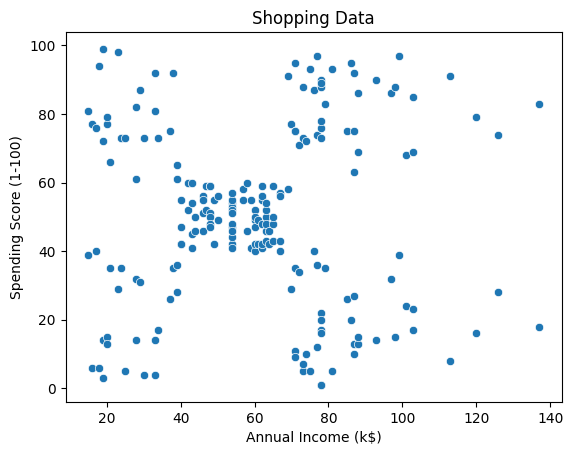

In [27]:
# 데이터의 분포를 확인해봅시다.

sns.scatterplot(x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                data=data)
plt.title("Shopping Data")
plt.show()

In [28]:
# 군집화 결과를 시각화하기 위한 함수
def scatter_plot_clustering(data, cluster_labels, title):
    plt.figure(figsize=(10, 7))
    plt.scatter(data.iloc[:, 0], 
                data.iloc[:, 1], 
                c=cluster_labels, 
                cmap='rainbow',)
    plt.title(title)
    plt.show()

### 1. 단일 연결법을 사용한 군집화

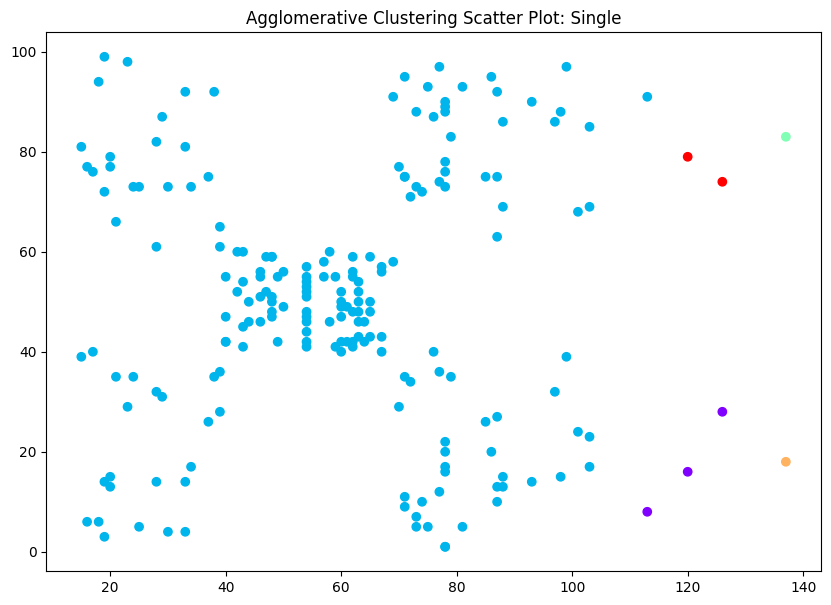

In [29]:
# 먼저 단일 연결법을 이용해 군집화를 진행해보겠습니다.

cluster = AgglomerativeClustering(n_clusters=5,  # 군집의 개수
                                  metric='euclidean', # 거리 측정 방법
                                  linkage='single') # 군집 간 연결 방법
cluster.fit_predict(data)

# 군집화 결과 시각화
scatter_plot_clustering(data, 
                         cluster.labels_, 
                         "Agglomerative Clustering Scatter Plot: Single")

같은 색의 점들은 같은 군집에 속해있습니다.군집화가 잘 이루어지지는 않은 것 같습니다...\
군집 간 연결 방법을 다른 방법으로 바꾸어 시도해 봅시다.

### 2. 완전 연결법 사용

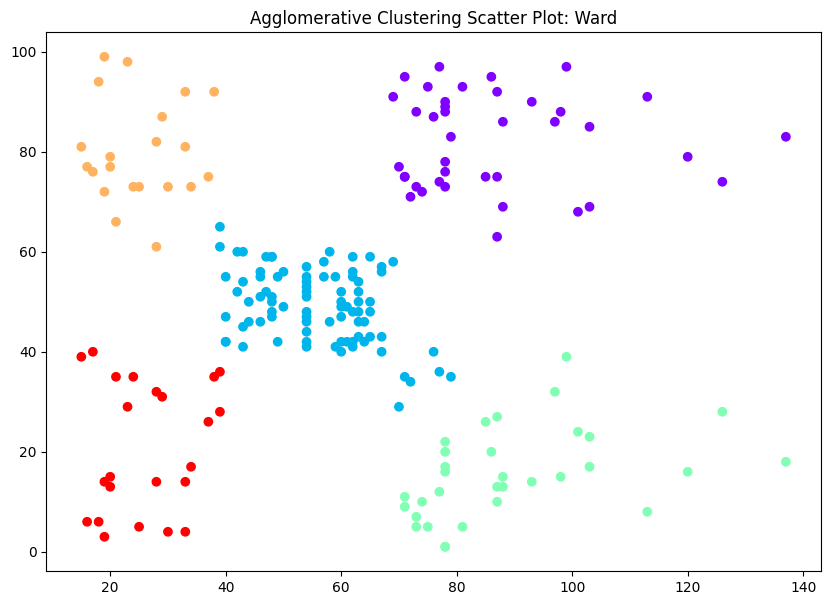

In [30]:
# 완전 연결법
cluster = AgglomerativeClustering(n_clusters=5, 
                                  metric='euclidean', 
                                  linkage='complete')
cluster.fit_predict(data)

# 군집화 결과 시각화
scatter_plot_clustering(data, 
                         cluster.labels_, 
                         "Agglomerative Clustering Scatter Plot: Ward")

단일 연결법보다 나은 결과가 나온 것을 확인하실 수 있습니다 :)

# 실습 2) k-means 군집화 후 결과 평가하기

## 데이터 불러오기

### wine dataset

> 실습에서 사용할 wine 데이터셋에 대한 설명입니다.

- 총 샘플 수: 178개 와인 샘플
- 클래스 수(`wine.labels_`): 3개 (와인의 종류 - 0, 1, 2)

데이터셋의 각 변수에 대한 설명은 다음과 같습니다.


| Feature 이름 | 설명 |
|--------------|------|
| **Alcohol** | 알코올 함량 (%) |
| **Malic acid** | 사과산 함량 (산미 관련 성분) |
| **Ash** | 재 성분 (미네랄 포함) |
| **Alcalinity of ash** | 재의 알칼리도 (pH 관련) |
| **Magnesium** | 마그네슘 함량 |
| **Total phenols** | 총 페놀 화합물 함량 (항산화 관련) |
| **Flavanoids** | 플라보노이드 함량 (페놀의 일종) |
| **Nonflavanoid phenols** | 비-플라보노이드 페놀 함량 |
| **Proanthocyanins** | 프로안토시아닌 함량 (탄닌 계열) |
| **Color intensity** | 색상 강도 |
| **Hue** | 색조 (색깔의 농도나 분위기) |
| **OD280/OD315 of diluted wines** | 와인을 희석한 후 280nm, 315nm 흡광도 비율 (페놀 함량 추정) |
| **Proline** | 프롤린 (아미노산 일종, 단백질 구성 성분) |


In [31]:
# 데이터셋 가져오기
from sklearn.datasets import load_wine
wine = load_wine()

데이터를 가져왔으니 간단히 살펴봐야겠죠??

In [32]:
wine_data = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [33]:
# 데이터셋의 정보 확인
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

이제 데이터를 어느 정도 탐색했으니, k-means를 활용해 군집화를 진행해봅시다!

## k-means 모델 사용하기

우선 클러스터의 수를 3으로 설정하고 군집화를 진행해보겠습니다.

In [34]:
from sklearn.preprocessing import StandardScaler

# 원본 데이터 복사하기
df = wine_data.copy()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(wine.data)

# 2단계: K-Means 학습 (표준화된 데이터로)
kmeans = KMeans(n_clusters=3,
               init='k-means++', 
               max_iter=300,
               n_init=10,
               random_state=42)
kmeans.fit(df_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


`fit` 이후 학습시킨 모델의 `labels_` 속성 값을 확인하여 할당된 클러스터 값이 담긴 배열을 확인할 수 있습니다.

(또는 `kmeans.fit_predict(data)` 를 이용하여 학습과 동시에 `y_pred`와 같은 변수에 클러스터링 결과를 넣어줄 수도 있습니다. 이 결과는 `kmeans.labels_`와 동일합니다.)

In [35]:
print(kmeans.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


이렇게만 봐서는 알기가 어려우니, 군집화 결과를 데이터프레임에 'cluster' 라는 이름의 컬럼으로 추가한 후 각 행의 실제 target 값과 비교해보겠습니다.

In [ ]:
df['cluster'] = kmeans.***    # 클러스터링 결과(labels_)를 데이터프레임에 추가합니다.
df['target'] = wine.target        # 원본 데이터셋에 존재하는 실제 target 컬럼을 추가해줍니다.
df_result = df.groupby(['target', 'cluster']).size().reset_index(name='count')

In [37]:
df_result

,target,cluster,count
0,0,2,59
1,1,0,65
2,1,1,3
3,1,2,3
4,2,1,48


(주의!) 위 경우 target의 값과 cluster 값이 대응되지 않기 때문에, 단순히 두 숫자가 같다는 것만으로 클러스터링이 옳게 된 케이스라고 평가하시면 안 됩니다!

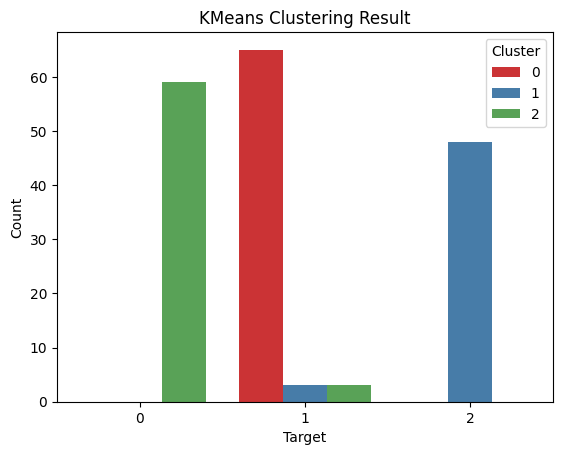

In [38]:
# 각 target별로 클러스터 분포를 시각화합니다.

sns.countplot(x='target', 
              hue='cluster', 
              data=df, 
              palette='Set1')
plt.title('KMeans Clustering Result')
plt.xlabel('Target')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.show()

흠... 이건 군집화가 잘 된 걸까요? 아니면 잘 되지 않은 걸까요? 조별로 한 번 토론을 진행해봅시다!

### 13기용 정답 - 각 실제 와인 종류(Target)가 거의 하나의 군집(Cluster)에만 모여있기 때문에 군집화가 성공한 것, 군집 번호는 그리 중요한 문제가 아니고, 분리가 잘 됐는지가 중요함!

k-means는 초기에 클러스터링 수를 몇으로 할당하는지에 따라 결과가 천차만별입니다.

우리는 우연히 클러스터의 개수를 3으로 선택을 했지만, 사실은 이것보단 엄밀한 방식으로 군집 수를 결정해야 해요

PCA를 통해 차원 축소를 진행하거나, 엘보우 방법을 통해 적절한 개수의 군집을 선정할 수 있습니다!


## PCA를 이용해 차원 축소 진행하기

In [39]:
df = wine_data.copy()

In [40]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### ⚠️ PCA에서 n_components 설정 시 주의사항

- `n_components`는 **최대 주성분 개수**보다 클 수 없습니다.
- PCA가 추출할 수 있는 주성분의 수는 `min(n_samples, n_features)`보다 작거나 같아야 합니다.
- 예: 와인 데이터셋은 특성 수가 13개이므로, `n_components`는 최대 13까지 설정 가능합니다.

주성분 개수를 수동으로 지정하지 않고, `n_components=0.95` 와 같이 **비율로 지정**할 수도 있습니다. 이 경우 전체 분산의 95% 이상을 설명하는 주성분 개수가 자동으로 선택됩니다.

In [ ]:
from sklearn.decomposition import PCA

# PCA 객체 생성
pca = PCA(n_components=0.95, random_state=42)

# PCA 학습 + 변환 (fit + transform)
wine_PCA = pca.***(df_scaled)

print(f"95% 분산 설명에 필요한 주성분 개수: {pca.n_components_}")
print(f"실제 설명된 분산: {sum(pca.explained_variance_ratio_):.3f}")

95% 분산 설명에 필요한 주성분 개수: 10
실제 설명된 분산: 0.962


PCA를 통해 분산의 95% 이상을 설명하려면 10개의 변수가 필요하다는 사실까지 파악했습니다!

하지만, 주성분 10개는 여전히 너무 많은 것 같아요

그러니 n_components의 비율을 조정하면서 적절한 개수를 찾는 확인을 진행해봅시다!

In [42]:
# 다른 분산 기준들 시도해보기
for threshold in [0.80, 0.85, 0.90, 0.95]:
    pca_test = PCA(n_components=threshold)
    pca_test.fit(df_scaled)
    print(f"{threshold*100}% 분산: {pca_test.n_components_}개 주성분")

80.0% 분산: 5개 주성분
85.0% 분산: 6개 주성분
90.0% 분산: 8개 주성분
95.0% 분산: 10개 주성분


정확도가 조금은 낮아졌지만, 주성분을 크게 줄일 수 있는 것을 알 수 있어요!

그럼 마지막으로 우리가 사용했던 3개의 그룹으로는 전체 분산의 얼마만큼을 설명할 수 있는 것인지 확인해볼까요?

In [43]:
pca = PCA(n_components=3, random_state=42)
wine_PCA = pca.fit_transform(df_scaled)

print(f"주성분 3개를 사용해 설명할 수 있는 실제 분산: {sum(pca.explained_variance_ratio_):.3f}")

주성분 3개를 사용해 설명할 수 있는 실제 분산: 0.665


생각보다 나쁘지 않은 수치를 기록하고 있는 것을 볼 수 있습니다.

다음으로는 엘보우 방법을 사용해서 적정한 k값을 추정하는 작업을 진행해볼게요

## 엘보우 방법(elbow method)을 사용해 적정 k값 추정하기

In [ ]:
# 왜곡 값을 저장할 빈 리스트 선언
distortions = []

# 2에서 11까지의 군집 개수에 대해 KMeans 모델로 군집화한 경우 SSE를 저장:
from sklearn.cluster import KMeans

for n in range(2, 11):
    km = KMeans(n_clusters=n,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=42)
    km.fit(wine_PCA)

    # k-means 모델에 대한 SSE(inertia_)를 리스트에 저장합니다.
    distortions.append(km.***)

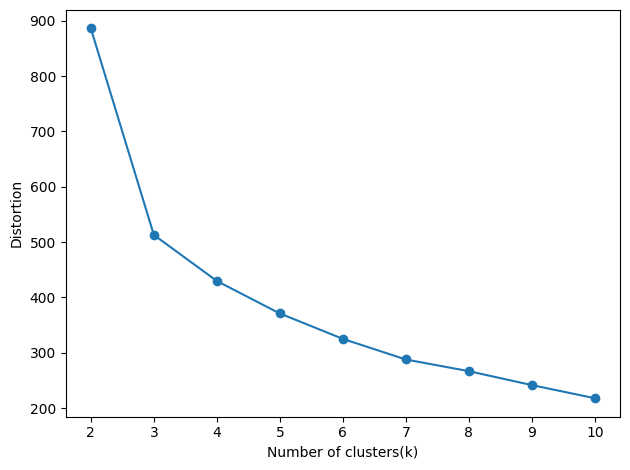

In [45]:
# SSE 값들을 그래프에 표시
plt.plot(range(2, 11), distortions, marker='o')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

### <font color="red">빈칸을 채워주세요!!</font>

이 데이터셋에서는 k = ()이 좋은 선택임을 알 수 있습니다.

(그래프가 완만해지는 지점!)

# 실습 3) 데이터셋에 DBSCAN을 적용해보고 k-means 군집화 결과와 비교하기

## 데이터 불러오기

원형 클러스터를 가정하는 k-means와 비교해 DBSCAN이 가지는 장점이 어떻게 드러나는지 확인하기 위해 반달 형태의 분포를 갖는 데이터셋에 두 알고리즘을 각각 적용해보겠습니다.

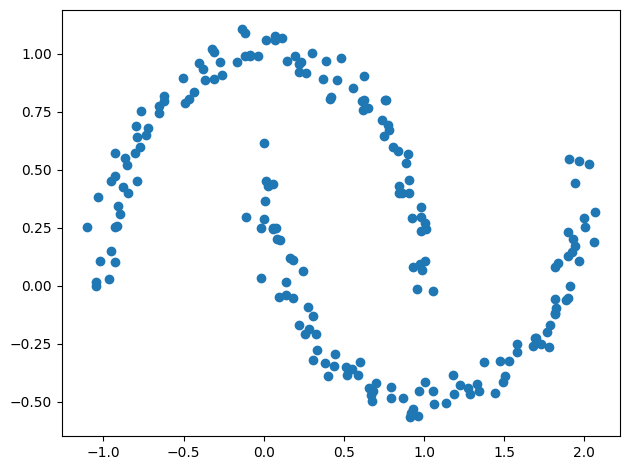

In [46]:
# 반달 모양 데이터셋 생성하기
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, 
                  noise=0.05, 
                  random_state=42)
plt.scatter(X[:,0], X[:,1])
plt.tight_layout()
plt.show()

## 군집화 진행

DBSCAN의 밀도 기반 알고리즘이 단순 거리 기반 알고리즘과 어떻게 다른지 확인하기 위해, 위 데이터를 각각 k-means와 DBSCAN을 활용해 군집화한 후 비교해보겠습니다.

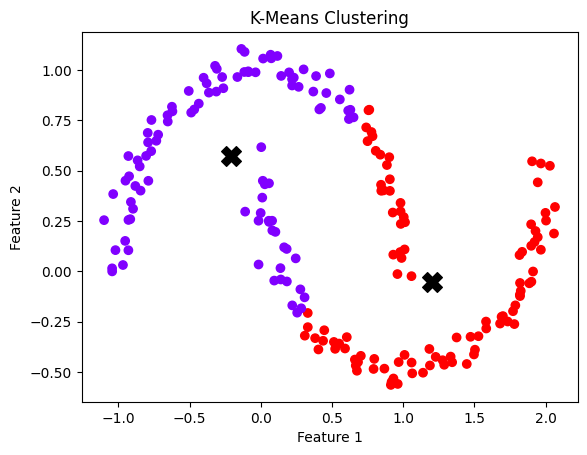

In [ ]:
# 복습! 먼저 위 데이터(X, y)를 k-means로 군집화 해봅시다.

# 클러스터링 진행
# 아까 전에 작성했던 kmeans 객체를 참고하여 작성해보세요~
# 클러스터 개수(n_clusters)는 두 개로 설정합니다.
# 나머지 파라미터들은 기본값으로 둡니다.
kmeans = KMeans(n_clusters=*, 
                random_state=42)
y_pred = kmeans.***(X)  # 예측값을 y_pred에 저장합니다.
                                # 힌트: y_pred는 kmeans.labels_와 동일한 값을 가져야 합니다.

# 결과 시각화
# 클러스터 중심 시각화
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='X', label='Centroids')

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

어떤가요? 데이터가 가지는 패턴을 잘 잡아내지는 못한 것 같습니다.

이번에는 DBSCAN으로 같은 데이터를 군집화해보겠습니다.

* DBSCAN에서 설정해야 하는 하이퍼 파라미터
1. `eps` : 두 포인트가 이웃이 되기 위한 포인트 사이의 최대 거리
    - eps가 너무 낮게 설정될 경우 같은 이웃으로 고려할 포인트가 없을 수 있습니다. → 너무 많은 포인트가 이상치로 간주됨!
2. `min_samples` : 한 포인트가 군집이 되기 위한 eps 거리 내 최소 포인트 개수
    - 밀접한 포인트들이 최소 샘플수 이상 존재 → 중심점(core point)으로부터 eps 거리 내에 있는 다른 포인트는 해당 군집의 일부가 됨.

In [ ]:
# DBSCAN 클러스터링 진행
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(***=***, 
                ***=***, 
                metric='euclidean')
y_pred_dbscan = dbscan.fit_predict(X)

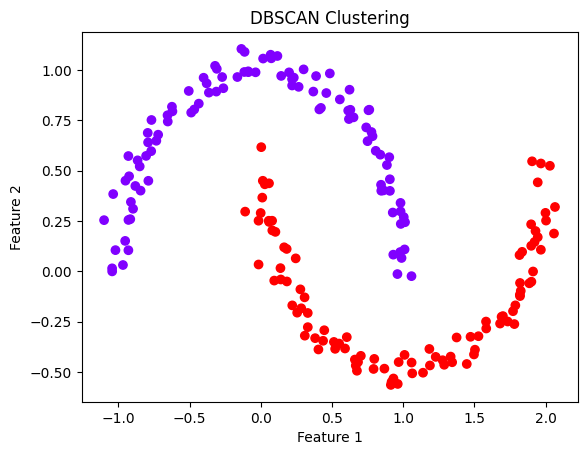

In [49]:
# 결과 시각화
plt.scatter(X[:,0], X[:,1], c=y_pred_dbscan, cmap='rainbow')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1") 
plt.ylabel("Feature 2")
plt.show()

k-means의 결과와 확연한 차이가 나타나는 것을 확인할 수 있습니다.

밀도 기준으로 군집을 나눈 것 또한 확인이 가능합니다. 

## 참고) HDBSCAN
다음 코드를 이용하면 HDBSCAN 모델을 사용할 수 있습니다.

* HDBSCAN에서 설정해야하는 파라미터
1.  `min_cluster_size` : 하나의 클러스터로 인정되기 위한 **최소 샘플 수**
2. `min_samples` : DBSCAN과 동일. 생략 시 `min_cluster_size`와 동일하게 설정됨.

In [50]:
# HDBSCAN 설치 여부 확인 후 필요 시 설치
try:
    import hdbscan
except ImportError:
    import sys
    !{sys.executable} -m pip install hdbscan
    import hdbscan

In [51]:
# HDBSCAN 클러스터링 진행
hdb = hdbscan.HDBSCAN(min_cluster_size=5, metric='euclidean')
y_pred_hdb = hdb.fit_predict(X)

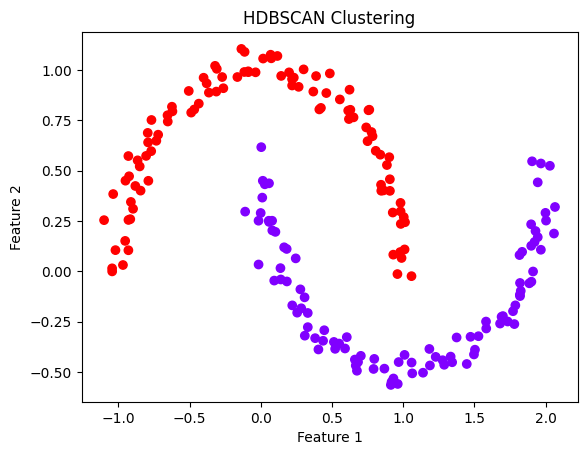

In [52]:
# 결과 시각화
plt.scatter(X[:,0], X[:,1], c=y_pred_hdb, cmap='rainbow')
plt.title("HDBSCAN Clustering")
plt.xlabel("Feature 1") 
plt.ylabel("Feature 2")
plt.show()

# 실습 4) GMM

iris 데이터를 이용해 GMM을 통한 군집화를 진행해봅시다.

## 데이터 불러오고 PCA 진행하기

In [53]:
from sklearn.datasets import load_iris

iris = load_iris()
# DataFrame 생성 (원본 특성명 사용)
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target  # 실제 라벨 추가

print(f"데이터 형태: {data.shape}")
print(f"특성명: {list(iris.feature_names)}")
print(f"타겟 클래스: {list(iris.target_names)}")
data.head()

데이터 형태: (150, 5)
특성명: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
타겟 클래스: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


PCA를 통해 변수의 수를 줄여봅니다

In [54]:
from sklearn.decomposition import PCA

# PCA 파라미터 설정
n_components = 0.95         # 분산의 95% 보존
whiten = False              
random_state = 2018         

# PCA 객체 생성
pca = PCA(n_components=n_components,
          whiten=whiten,
          random_state=random_state)

# 특성 데이터만 PCA 적용 (타겟 제외)
X = data.iloc[:, :-1]  # 또는 data[feature_names]
iris_PCA = pca.fit_transform(X)

# 결과를 DataFrame으로 변환 (의미있는 컬럼명 추가)
n_components_actual = pca.n_components_
iris_PCA = pd.DataFrame(
    data=iris_PCA, 
    columns=[f'PC{i+1}' for i in range(n_components_actual)]
)

# PCA 정보 출력
print(f"원본 차원: {X.shape[1]}")
print(f"변환 후 차원: {iris_PCA.shape[1]}")
print(f"설명된 분산비: {pca.explained_variance_ratio_}")
print(f"누적 설명된 분산비: {pca.explained_variance_ratio_.cumsum()}")

원본 차원: 4
변환 후 차원: 2
설명된 분산비: [0.92461872 0.05306648]
누적 설명된 분산비: [0.92461872 0.97768521]


기존에는 주 성분이 4개로 4차원 데이터였지만, PCA를 통해 주성분을 2개로 줄이면서도 95% 정도를 보존할 수 있었습니다!

In [55]:
# 주성분이 2개로 줄어든 것을 확인
iris_PCA.head()

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


## GMM을 사용한 군집화

### GaussianMixture 파라미터

- `n_component` : gaussian mixture 모델의 총 개수 (GaussianMixture 객체의 가장 중요한 초기화 파라미터, default=1)
- covariance_type{‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’diag' : 군집의 모양
    - ‘full’ : 모든 모양의 타원 가능
    - ‘tied’ : 모든 군집이 동일한 타원 모양으로
    - ‘diag’ : 축에 나란한 타원 모양
    - ‘spherical’ : 원형 모양 (지름 다를수 있음)

참고 : https://scikit-learn.org/0.16/modules/generated/sklearn.mixture.GMM.html

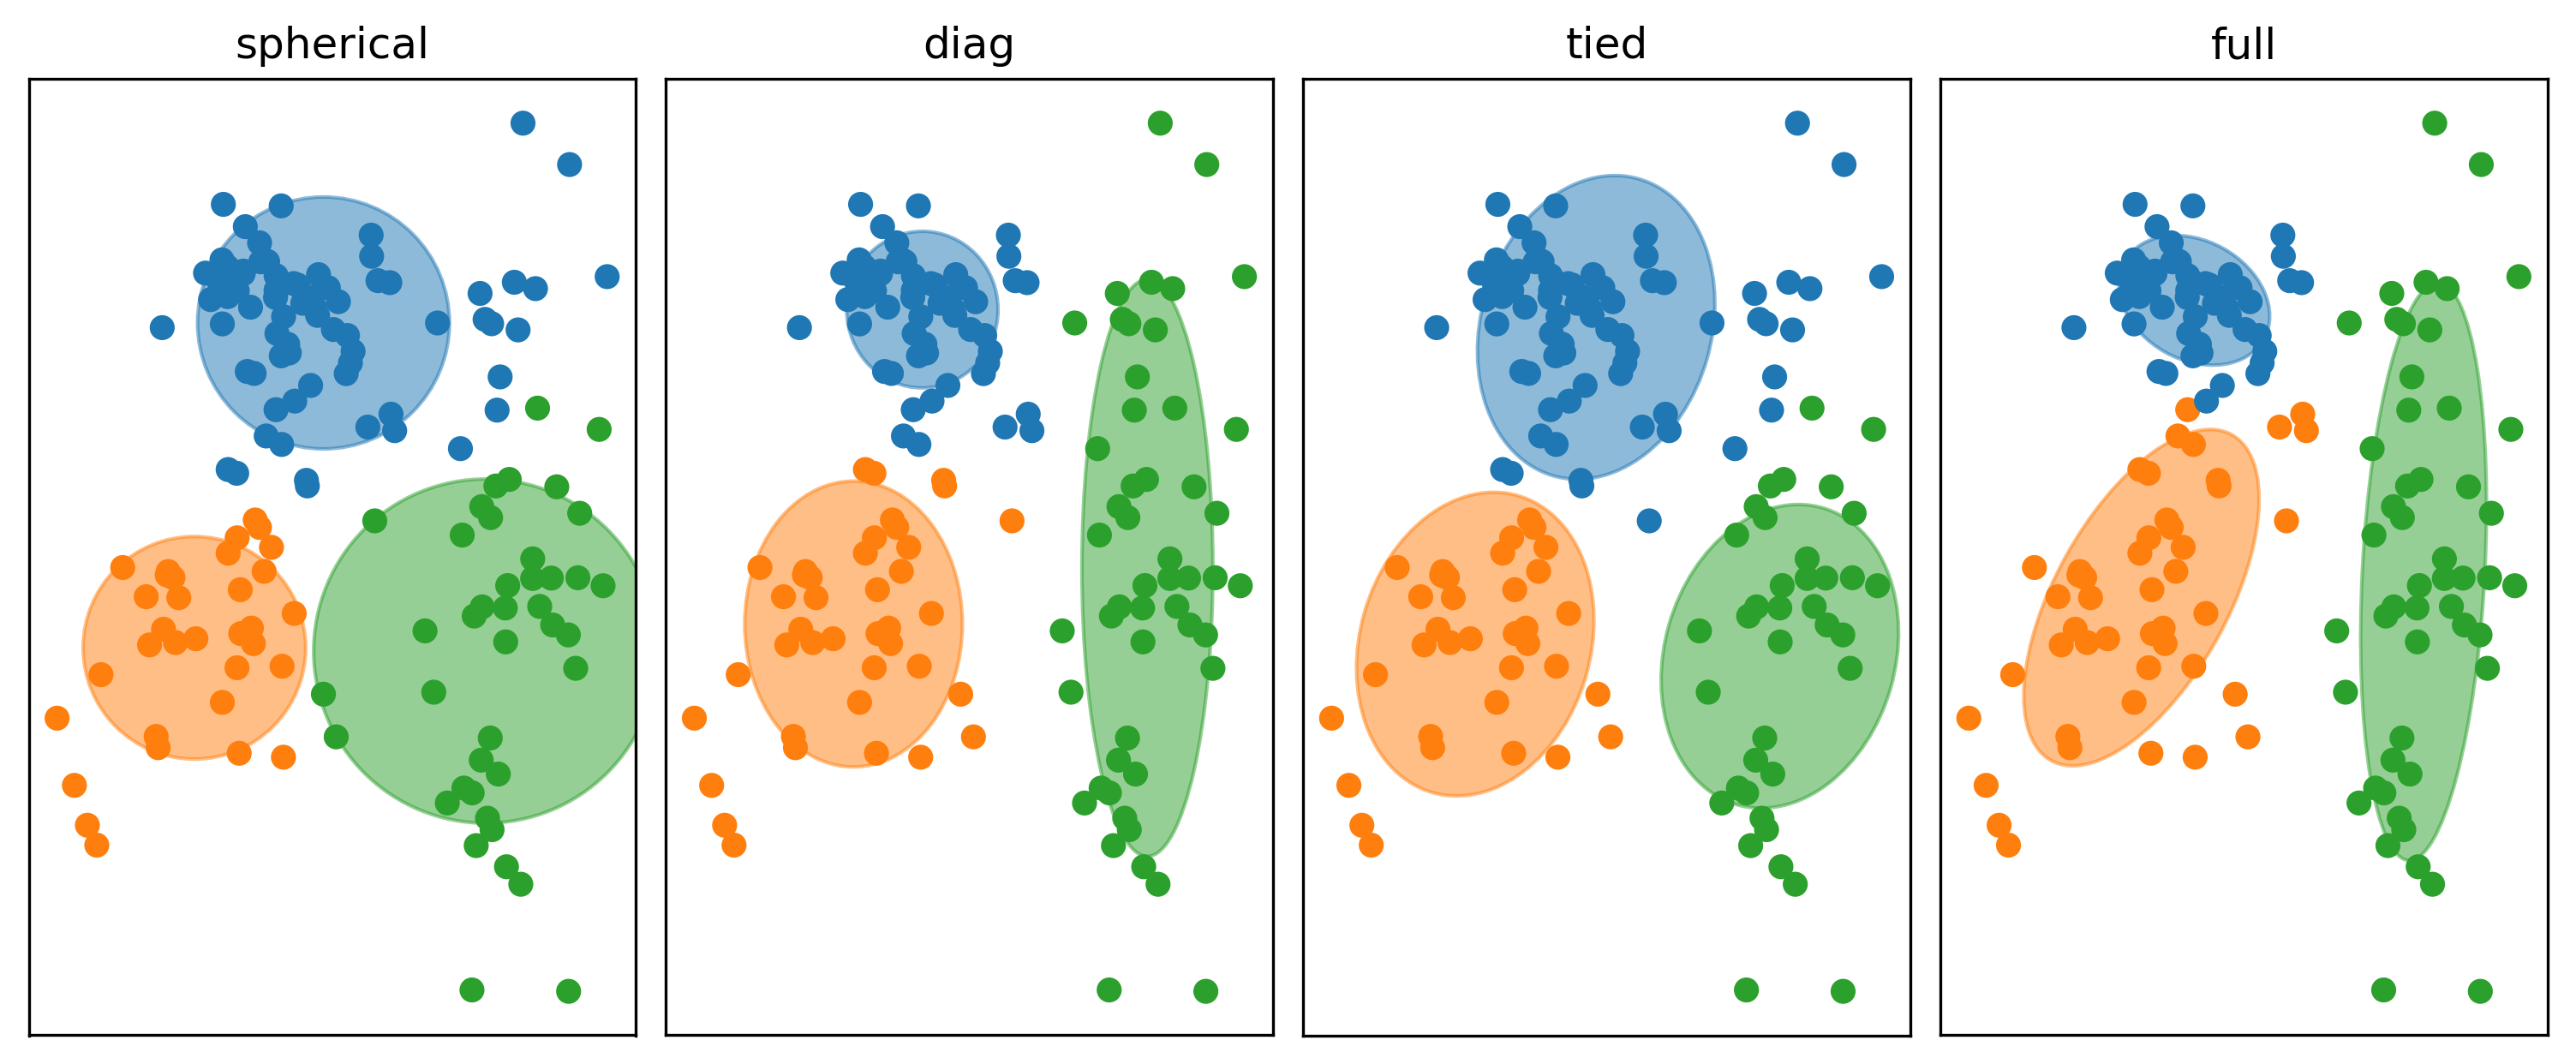

먼저, gmm을 통해 군집화를 사용해 봅니다

In [64]:
from sklearn.mixture import GaussianMixture

data = iris_PCA.copy()

gmm = GaussianMixture(n_components=3, 
                      covariance_type = 'full', 
                      random_state=42)
gmm.fit(data)
gmm_cluster_labels = gmm.predict(data)

군집화 결과를 간단한 표를 사용해 확인해봅시다

In [65]:
# 군집화 결과를 irisDF의 'gmm_cluster' 칼럼 명으로 저장
data['gmm_cluster'] = gmm_cluster_labels
data['target'] = iris.target # target : 꽃 종류 (0: Setosa, 1: Versicolor, 2: Virginica)  

print("=== GMM 군집화 결과 매핑 ===")
print("실제 품종: 0-Setosa, 1-Versicolor, 2-Virginica\n")

cross_table = pd.crosstab(data['target'], data['gmm_cluster'], 
                         rownames=['실제 품종'], colnames=['GMM 군집'])
print(cross_table)

=== GMM 군집화 결과 매핑 ===
실제 품종: 0-Setosa, 1-Versicolor, 2-Virginica

GMM 군집   0   1   2
실제 품종             
0        0  50   0
1        3   0  47
2       50   0   0


이번에는 시각화를 통해 군집화 결과를 확인해봅시다

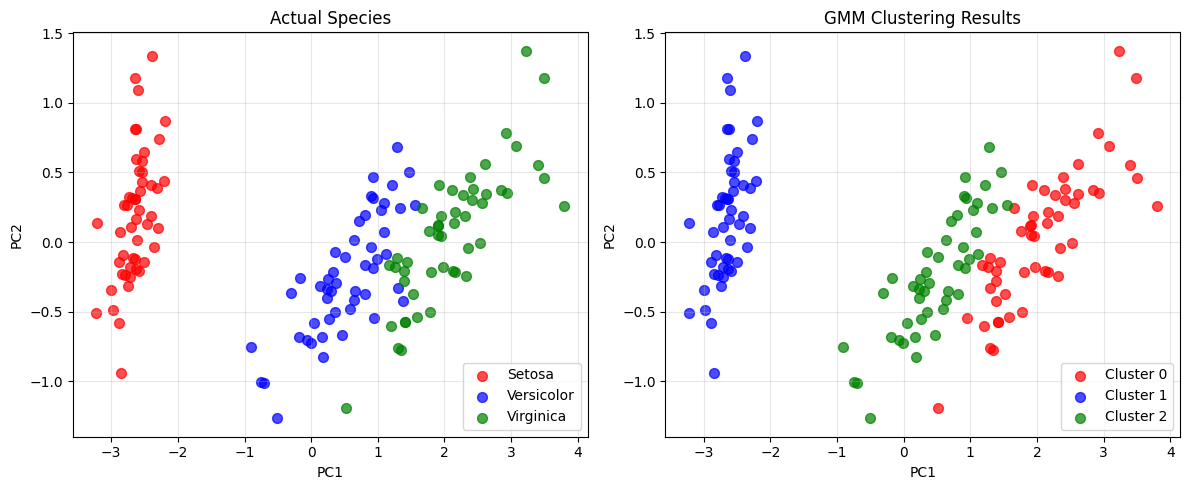

In [66]:
# Simple 2-plot comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Colors for each species/cluster
colors = ['red', 'blue', 'green']
species_names = ['Setosa', 'Versicolor', 'Virginica']

# 1) Actual labels
for i in range(3):
    mask = data['target'] == i
    filtered_data = data[mask]
    axes[0].scatter(filtered_data.iloc[:, 0], filtered_data.iloc[:, 1], 
                   c=colors[i], label=species_names[i], alpha=0.7, s=50)

axes[0].set_title('Actual Species')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2) GMM results
for i in range(3):
    mask = data['gmm_cluster'] == i
    filtered_data = data[mask]
    axes[1].scatter(filtered_data.iloc[:, 0], filtered_data.iloc[:, 1], 
                   c=colors[i], label=f'Cluster {i}', alpha=0.7, s=50)

axes[1].set_title('GMM Clustering Results')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

군집화가 굉장히 잘 된 것을 확인할 수 있습니다!

### 이번에는 k-means를 적용하고, iris 데이터셋에 어느 알고리즘이 더 적절한지 비교해봅시다.

In [67]:
# K-means clustering on PCA-transformed iris data
iris_kmeans = iris_PCA.copy()

# K-means model
kmeans = KMeans(n_clusters=3, 
                init='k-means++', 
                max_iter=300, 
                n_init=10, 
                random_state=42)

# Fit and predict
kmeans.fit(iris_kmeans)
kmeans_cluster_labels = kmeans.predict(iris_kmeans)

# Add results to dataframe
iris_kmeans['kmeans_cluster'] = kmeans_cluster_labels
iris_kmeans['target'] = iris.target

# 결과 분석
print("=== K-means 군집화 결과 ===")
print("실제 품종: 0-Setosa, 1-Versicolor, 2-Virginica")
print()

# 품종별 클러스터 분포
iris_kmeans_result = iris_kmeans.groupby(['target'])['kmeans_cluster'].value_counts()
print("실제 품종별 K-means 클러스터 분포:")
print(iris_kmeans_result)

# 교차표로 더 직관적 확인
print("\n=== 교차표 ===")
kmeans_cross_table = pd.crosstab(iris_kmeans['target'], iris_kmeans['kmeans_cluster'], 
                                rownames=['실제 품종'], colnames=['K-means 클러스터'])
print(kmeans_cross_table)

# 모델 정보
print(f"\n=== 모델 정보 ===")
print(f"관성 (클러스터 내 분산의 합): {kmeans.inertia_:.2f}")
print(f"수렴까지 반복 횟수: {kmeans.n_iter_}")
print(f"클러스터 중심점 개수: {kmeans.cluster_centers_.shape[0]}개")

=== K-means 군집화 결과 ===
실제 품종: 0-Setosa, 1-Versicolor, 2-Virginica

실제 품종별 K-means 클러스터 분포:
target  kmeans_cluster
0       1                 50
1       2                 47
        0                  3
2       0                 36
        2                 14
Name: count, dtype: int64

=== 교차표 ===
K-means 클러스터   0   1   2
실제 품종                   
0              0  50   0
1              3   0  47
2             36   0  14

=== 모델 정보 ===
관성 (클러스터 내 분산의 합): 63.82
수렴까지 반복 횟수: 10
클러스터 중심점 개수: 3개


이번에는 시각화를 진행해봅시다!

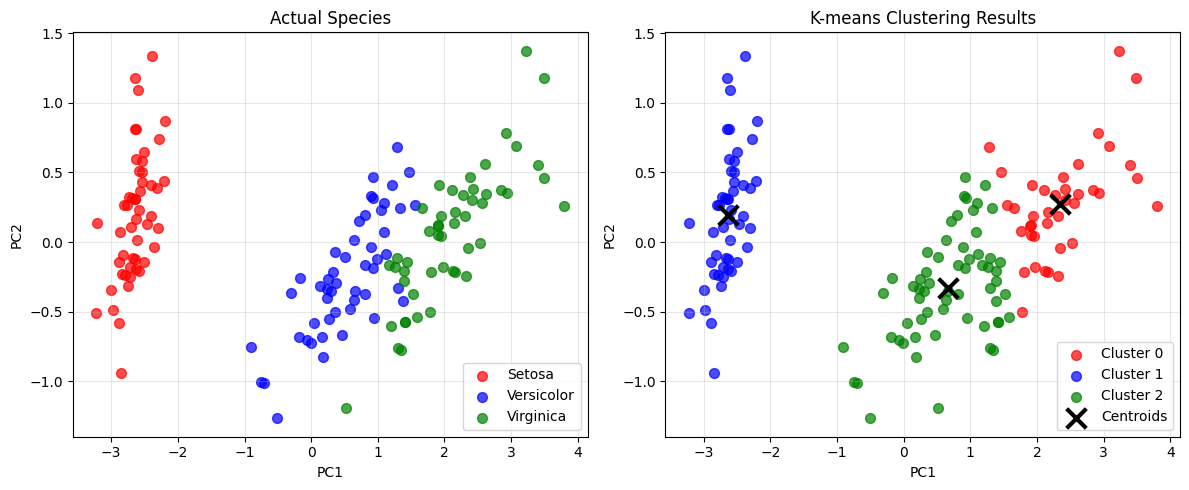

In [69]:
# Simple 2-plot comparison for K-means
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Colors for each species/cluster
colors = ['red', 'blue', 'green']
species_names = ['Setosa', 'Versicolor', 'Virginica']

# 1) Actual labels
for i in range(3):
    mask = iris_kmeans['target'] == i
    filtered_data = iris_kmeans[mask]
    axes[0].scatter(filtered_data.iloc[:, 0], filtered_data.iloc[:, 1], 
                   c=colors[i], label=species_names[i], alpha=0.7, s=50)

axes[0].set_title('Actual Species')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2) K-means results
for i in range(3):
    mask = iris_kmeans['kmeans_cluster'] == i
    filtered_data = iris_kmeans[mask]
    axes[1].scatter(filtered_data.iloc[:, 0], filtered_data.iloc[:, 1], 
                   c=colors[i], label=f'Cluster {i}', alpha=0.7, s=50)

# Add cluster centers
centers = kmeans.cluster_centers_
axes[1].scatter(centers[:, 0], centers[:, 1], 
               c='black', marker='x', s=200, linewidths=3, label='Centroids')

axes[1].set_title('K-means Clustering Results')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

GMM과 K-means의 결과를 비교하고, 어떤 차이점이 있으며, 어떤 모델이 이 데이터셋에 적합한지 조별로 토의를 해 봅시다!

() 조의 결론 : 

# 실습 5) 군집화 결과 평가하기

## 1. 실루엣 계수를 통해 군집화 결과 평가하기

GMM 군집화에 대한 Silhouette Score 분석
For n_components = 2, Average silhouette score = 0.6436
For n_components = 3, Average silhouette score = 0.7092
For n_components = 4, Average silhouette score = 0.5906
For n_components = 5, Average silhouette score = 0.5854


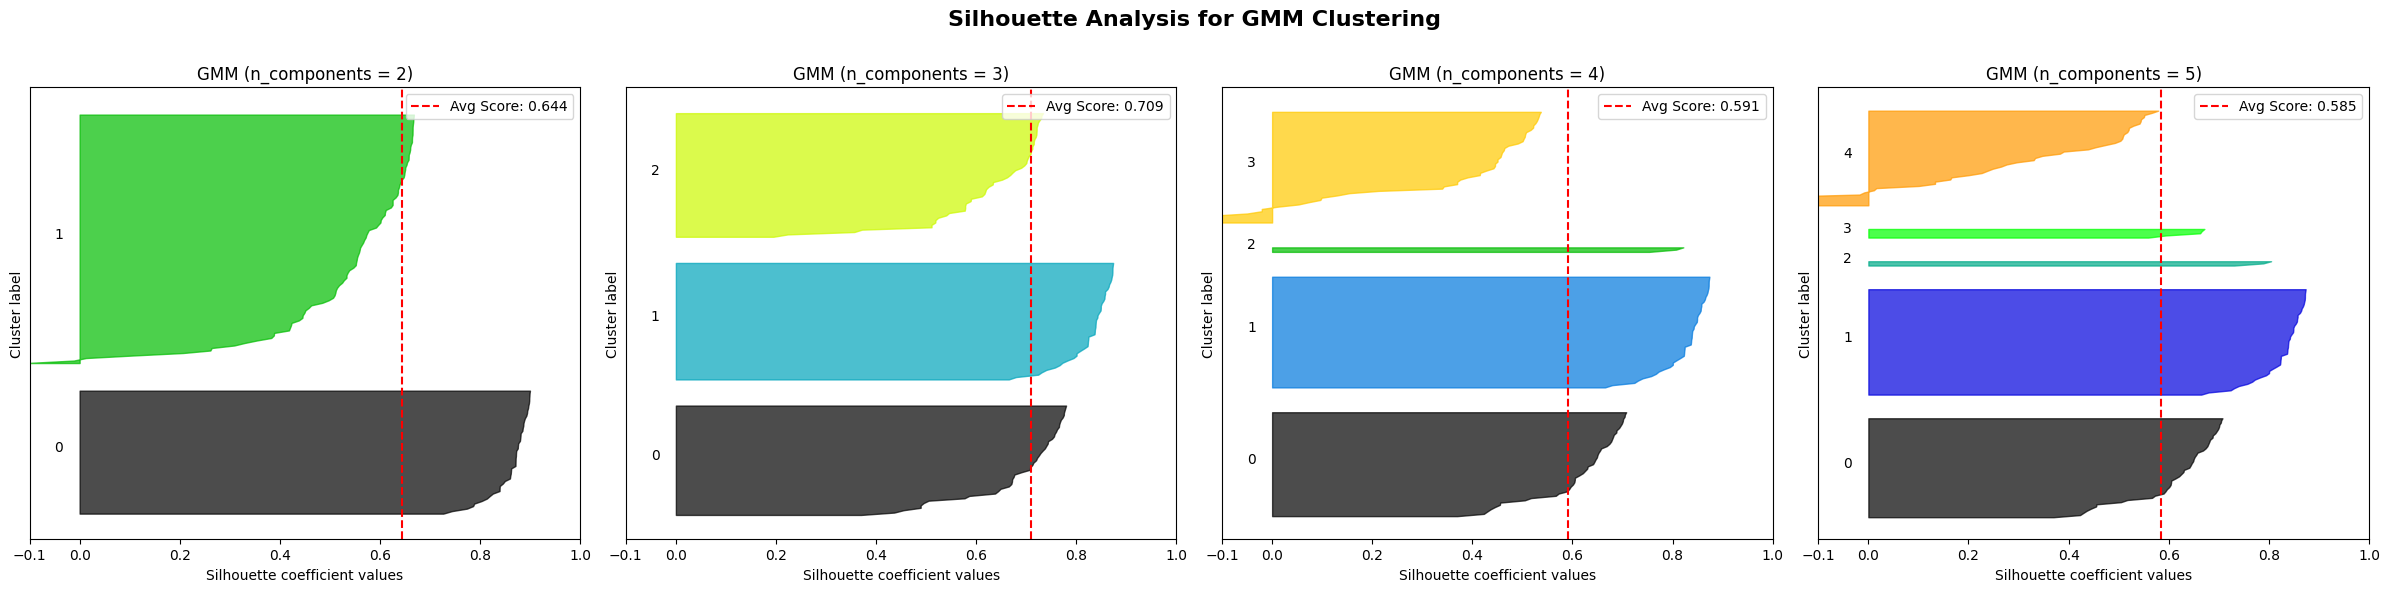


아이리스 데이터셋 GMM 분석 결과 해석
• 실루엣 점수 해석:
  - 0.7 ~ 1.0: 강한 구조의 클러스터
  - 0.5 ~ 0.7: 합리적인 구조의 클러스터
  - 0.25 ~ 0.5: 약한 구조의 클러스터
  - 0.25 미만: 클러스터링이 적절하지 않음

• 최적 클러스터 수는 평균 실루엣 점수가 가장 높은 경우
• 각 클러스터의 두께는 해당 클러스터의 샘플 수를 나타냄


In [70]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

def plot_silhouette_gmm(X, num_clusters):
    # Ensure column names are strings for compatibility
    X.columns = X.columns.astype(str)
    n_cols = len(num_clusters)
    fig, axes = plt.subplots(1, n_cols, figsize=(6 * n_cols, 6))
    if n_cols == 1:
        axes = [axes]
        
    for idx, n_clusters in enumerate(num_clusters):
        ax1 = axes[idx]

        # Set the range for silhouette plot
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Perform GMM clustering
        gmm = GaussianMixture(n_components=n_clusters, random_state=42)
        cluster_labels = gmm.fit_predict(X)

        # Calculate silhouette scores
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(f"For n_components = {n_clusters}, Average silhouette score = {silhouette_avg:.4f}")

        # Calculate silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Get silhouette values for samples belonging to cluster i
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            # Generate color for this cluster
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        ax1.set_title(f"GMM (n_components = {n_clusters})")
        ax1.set_xlabel("Silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # Add vertical line for average silhouette score
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--", 
                   label=f'Avg Score: {silhouette_avg:.3f}')
        
        # Formatting
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        ax1.legend(loc='upper right')

    plt.suptitle("Silhouette Analysis for GMM Clustering", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

# Analysis
print("=" * 50)
print("GMM 군집화에 대한 Silhouette Score 분석")
print("=" * 50)
plot_silhouette_gmm(data, [2, 3, 4, 5])

# Additional analysis for our specific case
print("\n" + "=" * 50)
print("아이리스 데이터셋 GMM 분석 결과 해석")
print("=" * 50)
print("• 실루엣 점수 해석:")
print("  - 0.7 ~ 1.0: 강한 구조의 클러스터")
print("  - 0.5 ~ 0.7: 합리적인 구조의 클러스터") 
print("  - 0.25 ~ 0.5: 약한 구조의 클러스터")
print("  - 0.25 미만: 클러스터링이 적절하지 않음")
print("\n• 최적 클러스터 수는 평균 실루엣 점수가 가장 높은 경우")
print("• 각 클러스터의 두께는 해당 클러스터의 샘플 수를 나타냄")

### <font color="red">결과를 해석해보세요!</font>


## 2. Dunn Index로 군집화 결과 평가하기


GMM 군집화에 대한 Dunn Index 평가
For n_components = 2, Dunn Index = 0.4051
For n_components = 3, Dunn Index = 0.5300
For n_components = 4, Dunn Index = 0.2648
For n_components = 5, Dunn Index = 0.1099
------------------------------------------------------------
최적 클러스터 수: 3 (Dunn Index = 0.5300)
------------------------------------------------------------


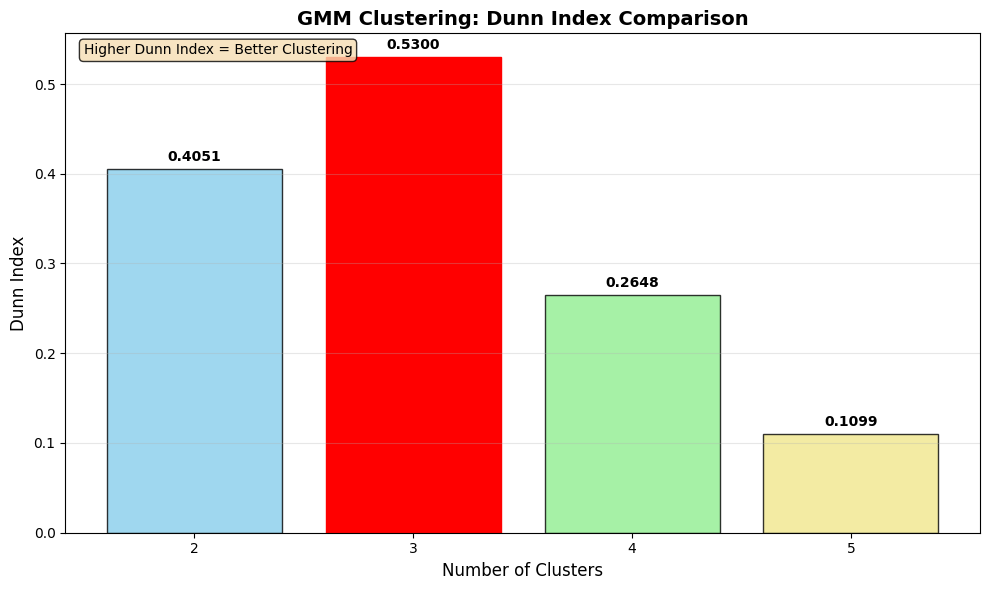


Dunn Index 해석 가이드
• Dunn Index = 클러스터 간 최소 거리 / 클러스터 내 최대 거리
• 높은 값일수록 좋은 클러스터링
• 클러스터가 잘 분리되고 내부 응집도가 높을수록 높은 값
• 일반적으로 0 이상의 값을 가지며, 무한대까지 가능
• 실루엣 점수와 함께 종합적 평가 권장


In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics.pairwise import euclidean_distances

def dunn_index(X, labels):
    """
    Calculate Dunn Index for clustering evaluation
    Dunn Index = min(inter-cluster distance) / max(intra-cluster distance)
    """
    unique_labels = np.unique(labels)
    num_clusters = len(unique_labels)
    
    if num_clusters <= 1:
        return 0.0

    # Calculate maximum intra-cluster distance (cohesion)
    max_intra_dists = np.zeros(num_clusters)
    for i in range(num_clusters):
        cluster_points = X[labels == unique_labels[i]]
        if len(cluster_points) > 1:
            intra_dists = euclidean_distances(cluster_points)
            max_intra_dists[i] = np.max(intra_dists)
    
    max_intra_cluster_dist = np.max(max_intra_dists)

    # Calculate minimum inter-cluster distance (separation)
    min_inter_cluster_dist = float('inf')
    for i in range(num_clusters):
        for j in range(i + 1, num_clusters):
            cluster_i_points = X[labels == unique_labels[i]]
            cluster_j_points = X[labels == unique_labels[j]]
            
            inter_dists = euclidean_distances(cluster_i_points, cluster_j_points)
            min_inter_cluster_dist = min(min_inter_cluster_dist, np.min(inter_dists))

    # Calculate Dunn Index
    if max_intra_cluster_dist == 0:
        return float('inf')
    
    return min_inter_cluster_dist / max_intra_cluster_dist

def evaluate_gmm_with_dunn(X, num_clusters):
    """
    Evaluate GMM clustering using Dunn Index for different number of clusters
    """
    # Convert DataFrame to numpy array if needed
    X_np = X.values if hasattr(X, 'values') else X
    
    dunn_scores = []
    
    print("=" * 60)
    print("GMM 군집화에 대한 Dunn Index 평가")
    print("=" * 60)
    
    for n_clusters in num_clusters:
        # Perform GMM clustering
        gmm = GaussianMixture(n_components=n_clusters, random_state=42)
        cluster_labels = gmm.fit_predict(X_np)
        
        # Calculate Dunn Index
        dunn_score = dunn_index(X_np, cluster_labels)
        dunn_scores.append(dunn_score)
        
        print(f"For n_components = {n_clusters}, Dunn Index = {dunn_score:.4f}")
    
    # Find optimal number of clusters
    optimal_idx = np.argmax(dunn_scores)
    optimal_n_clusters = num_clusters[optimal_idx]
    
    print("-" * 60)
    print(f"최적 클러스터 수: {optimal_n_clusters} (Dunn Index = {dunn_scores[optimal_idx]:.4f})")
    print("-" * 60)
    
    return dunn_scores, optimal_n_clusters

def plot_dunn_index_comparison(num_clusters, dunn_scores):
    """
    Create a bar plot to visualize Dunn Index scores
    """
    plt.figure(figsize=(10, 6))
    
    # Create bar plot
    bars = plt.bar(range(len(num_clusters)), dunn_scores, 
                   color=['skyblue', 'lightcoral', 'lightgreen', 'khaki'][:len(num_clusters)],
                   alpha=0.8, edgecolor='black', linewidth=1)
    
    # Highlight the best score
    max_idx = np.argmax(dunn_scores)
    bars[max_idx].set_color('red')
    bars[max_idx].set_alpha(1.0)
    
    # Add value labels on bars
    for i, (n_cluster, score) in enumerate(zip(num_clusters, dunn_scores)):
        plt.text(i, score + max(dunn_scores) * 0.01, f'{score:.4f}', 
                ha='center', va='bottom', fontweight='bold')
    
    plt.xlabel('Number of Clusters', fontsize=12)
    plt.ylabel('Dunn Index', fontsize=12)
    plt.title('GMM Clustering: Dunn Index Comparison', fontsize=14, fontweight='bold')
    plt.xticks(range(len(num_clusters)), num_clusters)
    plt.grid(axis='y', alpha=0.3)
    
    # Add interpretation
    plt.text(0.02, 0.98, 'Higher Dunn Index = Better Clustering', 
             transform=plt.gca().transAxes, fontsize=10, 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

# Perform analysis
num_clusters = [2, 3, 4, 5]
dunn_scores, optimal_clusters = evaluate_gmm_with_dunn(data, num_clusters)

# Create visualization
plot_dunn_index_comparison(num_clusters, dunn_scores)

# Interpretation guide
print("\n" + "=" * 60)
print("Dunn Index 해석 가이드")
print("=" * 60)
print("• Dunn Index = 클러스터 간 최소 거리 / 클러스터 내 최대 거리")
print("• 높은 값일수록 좋은 클러스터링")
print("• 클러스터가 잘 분리되고 내부 응집도가 높을수록 높은 값")
print("• 일반적으로 0 이상의 값을 가지며, 무한대까지 가능")
print("• 실루엣 점수와 함께 종합적 평가 권장")
print("=" * 60)

### <font color="red">결과를 해석해보세요!</font>


수고하셨습니다!